In [1]:
#importamos librerias necesarias

import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings("ignore")


In [2]:
HIPOTESIS INICIALES:

Hipotesis 1) El numero recomendable de horas de sueño es ente 7-8
Hipotesis 2) Dormir bien mejora la salud

HIPOTESIS TRANSCURSO:


SyntaxError: unmatched ')' (1337572745.py, line 3)

In [ ]:
#importamos base de datos
sueño_salud = pd.read_csv('C:\\Users\\juanc\\Desktop\\proyecto\\2-Data_Analysis\\Entregas\\Entregas\\EDA\\Proyecto_EDA.ipynb\\Base de datos\\Sleep_health_and_lifestyle_dataset.csv')
sueño_salud

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
#ver cuantas filas y columnas
sueño_salud.shape

(374, 13)

In [ ]:
#Ver tabla 
sueño_salud.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#miramos si hay algun NAN
sueño_salud.info()
#en sleep disorder hay, debido a que si no tiene la persona se deja en blanco

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
#rellenar los nan con normal
sueño_salud =sueño_salud.fillna("Normal")

In [ ]:
#ver si hay datos duplicados
sueño_salud.duplicated().sum()

0

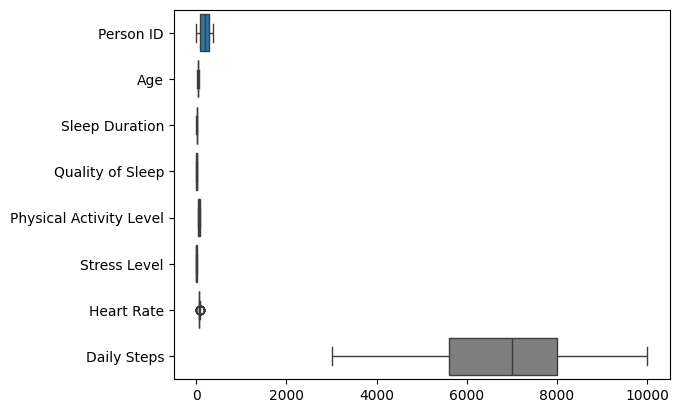

In [ ]:
#no hay outliers, solo heart rate
sns.boxplot(sueño_salud, orient= 'h');


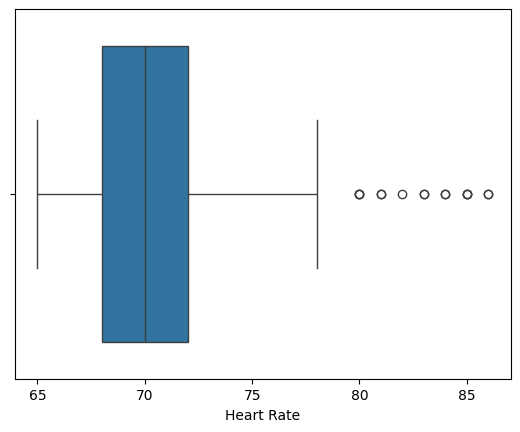

In [ ]:
#Tiene sentido estos valores y no son desproporcionados los dejamos. Es la unica variable con outlier
sns.boxplot(sueño_salud["Heart Rate"], orient= 'h');

In [ ]:
#checkear que cada columna es el tipo de dato que deberia
print(sueño_salud['Age'].dtype)
print(sueño_salud['Sleep Duration'].dtype)
print(sueño_salud['Quality of Sleep'].dtype)
print(sueño_salud['Physical Activity Level'].dtype)
print(sueño_salud['Stress Level'].dtype)
print(sueño_salud['Heart Rate'].dtype)
print(sueño_salud['Daily Steps'].dtype)
print(sueño_salud['Gender'].dtype)
print(sueño_salud['Blood Pressure'].dtype)
print(sueño_salud['BMI Category'].dtype)
print(sueño_salud['Sleep Disorder'].dtype)

int64
float64
int64
int64
int64
int64
int64
object
object
object
object


In [ ]:
#No tiene sentido mantener esta variable, profesiones no representativas y otras sobrerepresentadas
sueño_salud['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
sueño_salud['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [ ]:
#Mascara boolenaos para el genero y asi numerizar la varibale
mascara = {'Male': 0, 'Female': 1}
sueño_salud['Gender'] = sueño_salud['Gender'].replace(mascara)
sueño_salud.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
sueño_salud['BMI Category'].unique()




array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
#En la base de datos se indica que hay 4 tipos de pesos obeso, sobrepeso, normal y delgado: por lo que que se entiende que normal weiht equivale a delgado
sueño_salud['BMI Category'] = sueño_salud['BMI Category'].replace('Normal Weight', 'Underweight')


In [ ]:
# Crea una nueva columna llamada 'BMI Category Binary' donde los valores de 'BMI Category'
# que son 'Obese' o 'Overweight' se asignan como 1, y los demás como 0
sueño_salud['BMI Category Binary'] = sueño_salud['BMI Category'].apply(lambda x: 1 if x in ['Obese', 'Overweight'] else 0)
sueño_salud

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category Binary
0,1,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal,1
1,2,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,0
2,3,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,0
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
370,371,1,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
371,372,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
372,373,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1


In [ ]:
sueño_salud['Sleep Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
# Crea una nueva columna llamada 'Sleep Disorder Binary' donde los valores de 'Sleep Disorder'
# que son 'Sleep Apnea' o 'Insomnia' se asignan como 1, y los demás como 0
sueño_salud['Sleep Disorder Binary'] = sueño_salud['Sleep Disorder'].apply(lambda x: 1 if x in ['Sleep Apnea', 'Insomnia'] else 0)
sueño_salud
print(sueño_salud['Sleep Disorder Binary'].dtype)

int64


In [ ]:
#los maximos son siempre los 3 primeros digitos y los minimos los ultimos dos
sueño_salud['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
sueño_salud['Blood Pressure Max'] = sueño_salud['Blood Pressure'].str.slice(0, 3)
sueño_salud['Blood Pressure Min'] = sueño_salud['Blood Pressure'].str.slice(4, 6)
sueño_salud.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category Binary,Sleep Disorder Binary,Blood Pressure Max,Blood Pressure Min
0,1,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal,1,0,126,83
1,2,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,0,0,125,80
2,3,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,0,0,125,80
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,1,140,90
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,1,140,90


In [ ]:
#pasar a int las dos nuevas columnas que he creado de Blood preasure
sueño_salud['Blood Pressure Max'] = sueño_salud['Blood Pressure Max'].astype(int)
sueño_salud['Blood Pressure Min'] = sueño_salud['Blood Pressure Min'].astype(int)

print(sueño_salud['Blood Pressure Max'].dtype)
print(sueño_salud['Blood Pressure Min'].dtype)

int32
int32


In [ ]:
#elimino columnas ID y Occupation porque no las considero significativas para el estudio
sueño_salud.pop('Occupation')
sueño_salud.pop('Person ID')


0        1
1        2
2        3
3        4
4        5
      ... 
369    370
370    371
371    372
372    373
373    374
Name: Person ID, Length: 374, dtype: int64

In [ ]:
sueño_salud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Quality of Sleep         374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   BMI Category             374 non-null    object 
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  BMI Category Binary      374 non-null    int64  
 12  Sleep Disorder Binary    374 non-null    int64  
 13  Blood Pressure Max       374 non-null    int32  
 14  Blood Pressure Min       3

In [ ]:
sueño_salud.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category Binary,Sleep Disorder Binary,Blood Pressure Max,Blood Pressure Min
0,0,27,6.1,6,42,6,Overweight,126/83,77,4200,Normal,1,0,126,83
1,0,28,6.2,6,60,8,Normal,125/80,75,10000,Normal,0,0,125,80
2,0,28,6.2,6,60,8,Normal,125/80,75,10000,Normal,0,0,125,80
3,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,1,140,90
4,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,1,140,90


In [ ]:
sueño_salud.describe().round(1)
#la gente duerme entre 5-9 horas
#califan su sueño entre un 4-9 y el stress entre 3-8 => no ponen valores extremos
#la media de horas dormidas es 7.3

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category Binary,Sleep Disorder Binary,Blood Pressure Max,Blood Pressure Min
count,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0
mean,0.5,42.2,7.1,7.3,59.2,5.4,70.2,6816.8,0.4,0.4,128.6,84.6
std,0.5,8.7,0.8,1.2,20.8,1.8,4.1,1617.9,0.5,0.5,7.7,6.2
min,0.0,27.0,5.8,4.0,30.0,3.0,65.0,3000.0,0.0,0.0,115.0,75.0
25%,0.0,35.2,6.4,6.0,45.0,4.0,68.0,5600.0,0.0,0.0,125.0,80.0
50%,0.0,43.0,7.2,7.0,60.0,5.0,70.0,7000.0,0.0,0.0,130.0,85.0
75%,1.0,50.0,7.8,8.0,75.0,7.0,72.0,8000.0,1.0,1.0,135.0,90.0
max,1.0,59.0,8.5,9.0,90.0,8.0,86.0,10000.0,1.0,1.0,142.0,95.0


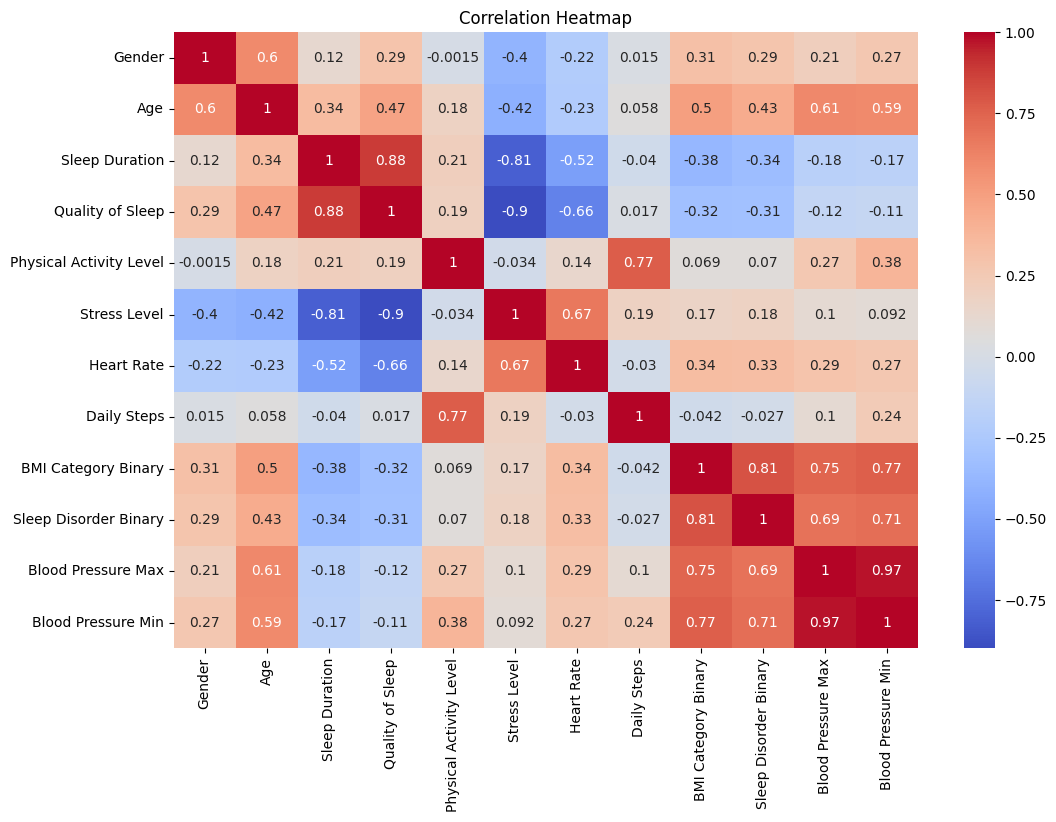

In [ ]:
#mapa de correlacion
#cogemos solo la columnas numericas
numerico = sueño_salud.select_dtypes(include=['float64', 'int64','int32'])
correlacion = numerico.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

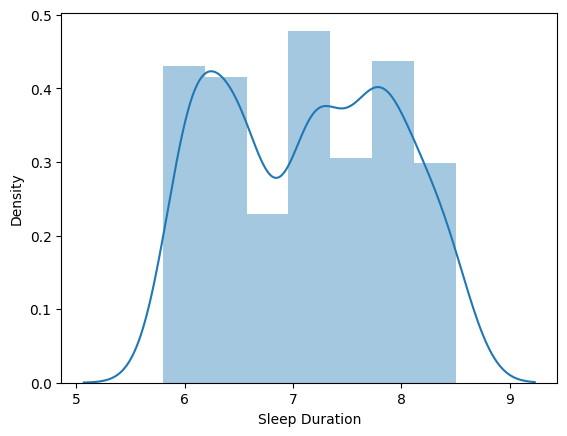

In [ ]:
sns.distplot(sueño_salud["Sleep Duration"]);

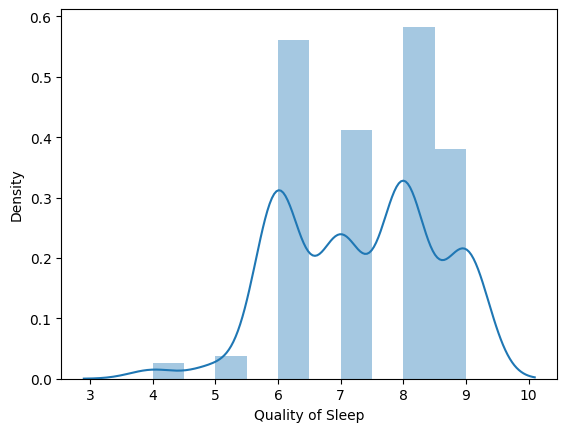

In [ ]:
sns.distplot(sueño_salud["Quality of Sleep"]);

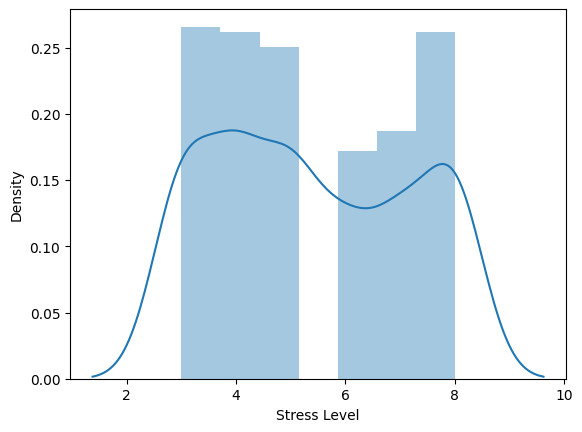

In [ ]:
sns.distplot(sueño_salud["Stress Level"]);

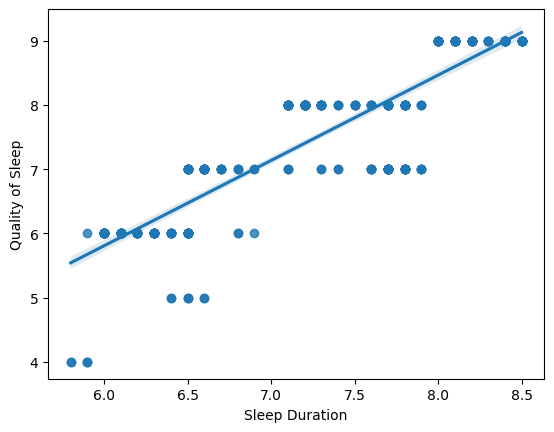

In [ ]:
# Crear el gráfico de dispersión con línea de regresión
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')


# Mostrar el gráfico
plt.show()

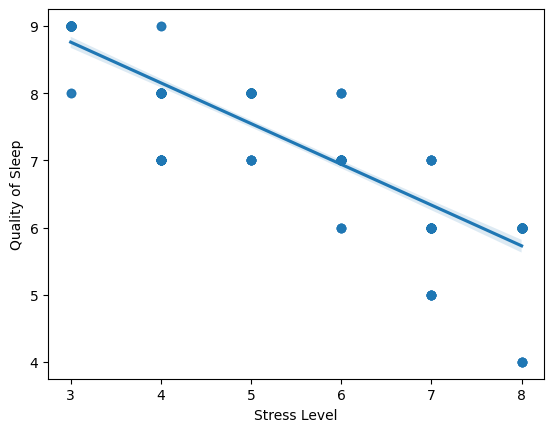

In [ ]:
# Crear el gráfico de dispersión con línea de regresión
sns.regplot(x='Stress Level', y='Quality of Sleep', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')


# Mostrar el gráfico
plt.show()

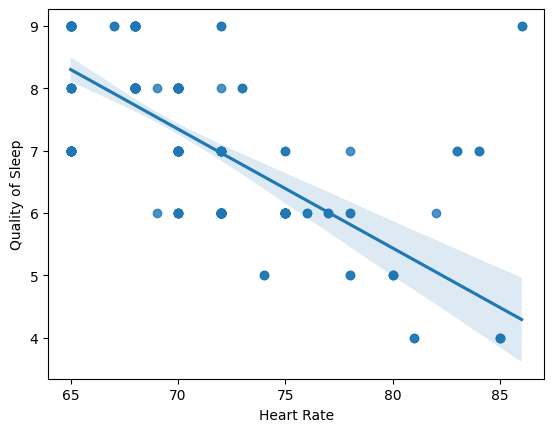

In [ ]:
# Crear el gráfico de dispersión con línea de regresión
sns.regplot(x='Heart Rate', y='Quality of Sleep', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')


# Mostrar el gráfico
plt.show()

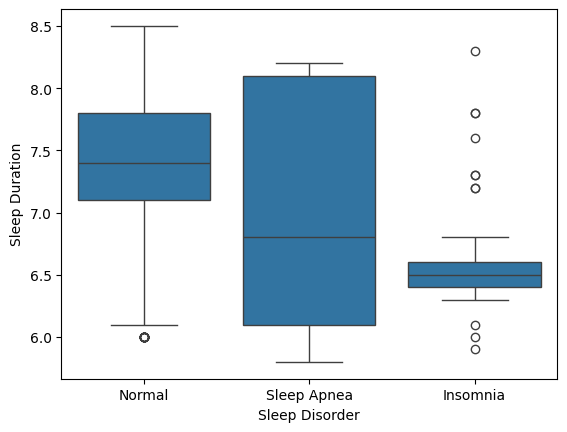

In [ ]:
sns.boxplot (data=sueño_salud, x="Sleep Disorder", y="Sleep Duration")
plt.show()
#algunos de insomnia estan durmiendo mucho, quizas estan medicados


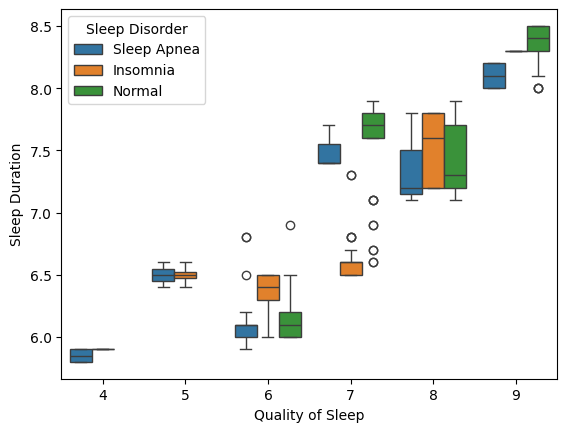

In [ ]:
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', hue='Sleep Disorder', data=sueño_salud)
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()

#la gente con sleep apnea descansa peor a horas de sueño iguales que normal

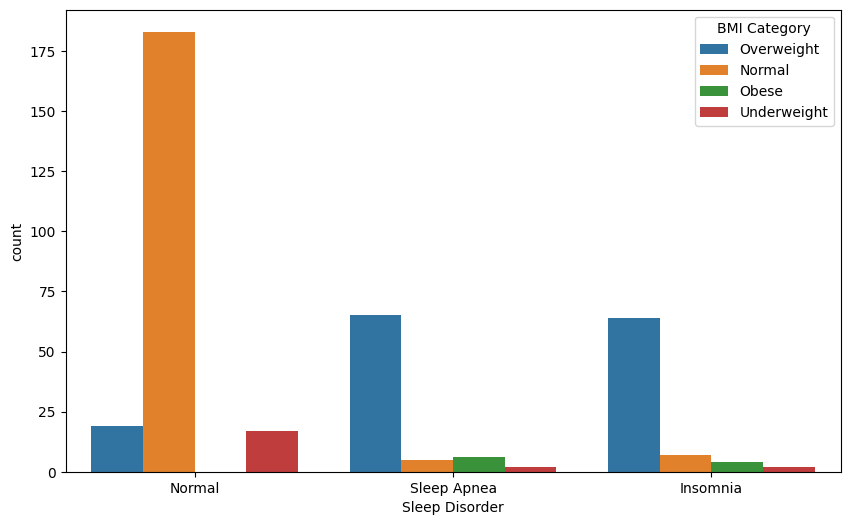

In [ ]:
    plt.figure(figsize=(10, 6))  
    sns.countplot(x="Sleep Disorder", hue="BMI Category", data=sueño_salud)
  
    plt.show()

# la gente con sobrepeso tiene apnea o insomnia

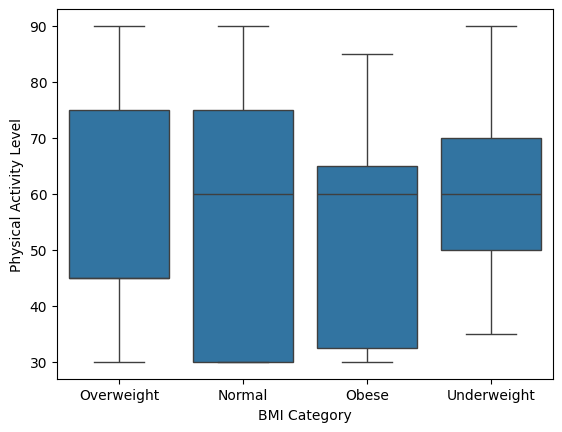

In [ ]:
sns.boxplot (data=sueño_salud, x="BMI Category", y="Physical Activity Level")
plt.show()
#La gente con sobrepeso no hacen menos cantidad de deporte,sorprendentemente



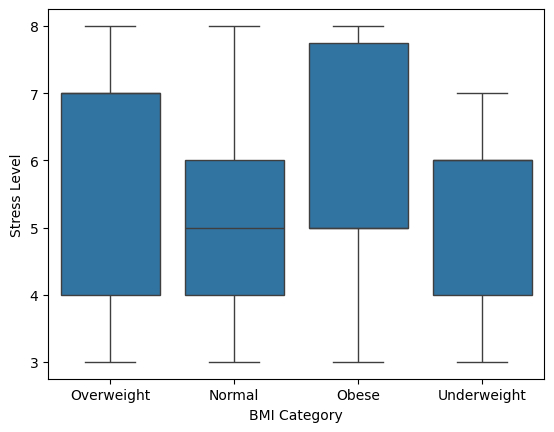

In [ ]:
sns.boxplot (data=sueño_salud, x="BMI Category", y="Stress Level")
plt.show()
#La gente con sobrepeso tiene mas estres